<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [29]:
# Import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define a function to run OLS and return model summary
def model_it(data, features):
    
    """Fit an OLS model and return model summary
    data: a DataFrame containing both features and target
    features: identical to 'data', but with the target dropped"""
    
    features_sum = '+'.join(features.columns)
    formula = 'Richness' + '~' + features_sum

    model = ols(formula=formula, data=data).fit()
    return model.summary()

In [27]:
# Read in data
data = pd.read_csv('ostiasusall2.csv')
data.head()

,SU,Brick,Wkd_Stone,Marble,Mortar,Plaster_Ptd,Plaster_White,Terracotta,Tesserae,Bone_Animal,...,Iron,Iron_Slag,Lead,Shell_Land,Shell_Sea,Terracotta_Fig,Votive_Bowl,Wood_Charcoal,SUM,Richness
0,su7001,0,0,0,0,7,0,0,0,0,...,0,1,1,0,0,0,0,0,102,1.78
1,su7002,0,1,0,0,0,0,0,0,0,...,3,6,0,0,0,0,0,0,83,2.16
2,su7005,2,0,0,0,12,7,0,11,56,...,19,0,0,2,0,0,0,1,359,2.18
3,su7018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,116,1.78
4,su7019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,46,1.45


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 42 columns):
SU                     32 non-null object
Brick                  32 non-null int64
Wkd_Stone              32 non-null int64
Marble                 32 non-null int64
Mortar                 32 non-null int64
Plaster_Ptd            32 non-null int64
Plaster_White          32 non-null int64
Terracotta             32 non-null int64
Tesserae               32 non-null int64
Bone_Animal            32 non-null int64
Bone_Human             32 non-null int64
Bone_Worked            32 non-null int64
Amphora                32 non-null int64
Black_Gloss            32 non-null int64
Bucchero               32 non-null int64
Ceramic_Storage        32 non-null int64
Coarseware             32 non-null int64
Cookware               32 non-null int64
Fineware               32 non-null int64
Internal_Red_Slip      32 non-null int64
Lamp                   32 non-null int64
Lead_Glaze             32 non-null 

In [4]:
# Drop unwanted columns
data2 = data.loc[:, ['SUM', 'Richness']]

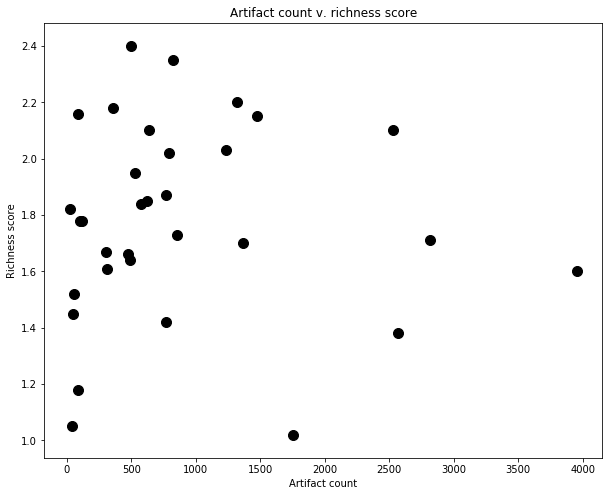

In [57]:
# Plot artifact v. richness score
plt.figure(figsize=(10,8))
plt.scatter(data2.SUM, data2.Richness, s=100, color='k')
plt.title('Artifact count v. richness score')
plt.xlabel('Artifact count')
plt.ylabel('Richness score')
plt.savefig('count_v_richness.png', dpi=300, padding=0.5)
plt.show();

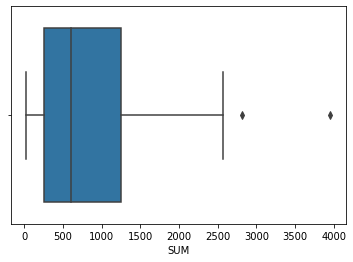

In [33]:
import seaborn as sns

sns.boxplot(data.SUM)

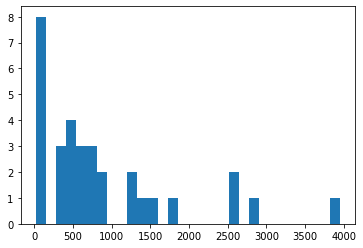

In [37]:
plt.hist(data.SUM, bins=30);

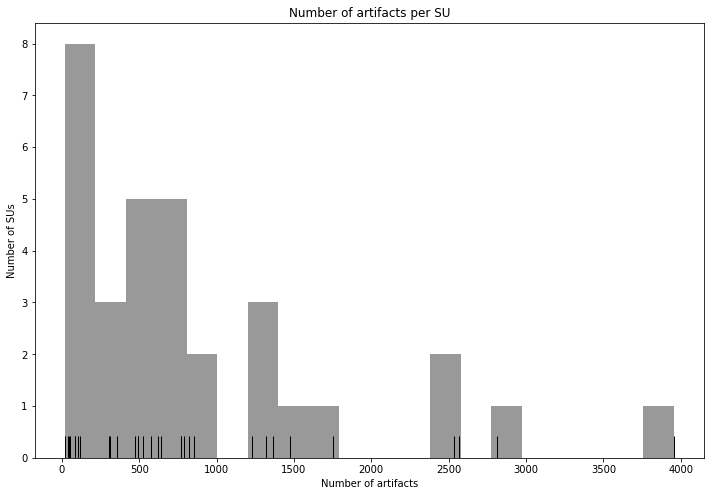

In [59]:
# Visualize artifact count per SU
plt.figure(figsize=(12,8))
sns.distplot(data.SUM, kde=False, bins=20, color='k')
sns.rugplot(data.SUM, color='k')
plt.title('Number of artifacts per SU')
plt.xlabel('Number of artifacts')
plt.ylabel('Number of SUs')
plt.savefig('count_per_su.png', dpi=300, padding=0.5)
plt.show();